# <u>Part One: Network Models</u>

## 1. Watts-Strogatz Networks

<u> Question :</u> Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$.
<li>Calculate the average shortest path length $\langle d \rangle$ for each one. </li>
<li>Describe what happens to the network when $p = 1$.</li>

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

shortest_path_list = []
for i in range(3):
    plt.figure()
    G = nx.watts_strogatz_graph(500,4,0.01,1)
    nx.draw(G,node_size=20)
    shortest_path_list.append(nx.average_shortest_path_length(G))
    
print(shortest_path_list)

[18.702541082164327, 18.702541082164327, 18.702541082164327]


If $p = 1$ in the Watts-Strogatz model then it will be equivalent to Erdös-Rényi one, because each edge between nodes will be removed. Then each node will be randomly linked to other nodes.

<u>Question :</u> Let's understand the behavior of the WS model as we increase p in more detail.. 
<li>Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$.</li>
<li>Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. </li>

In [ ]:
import numpy as np
p_list = [0,0.01,0.03,0.05,0.1,0.2]
average_d = np.array([0,0,0,0,0,0])

for i in range(50):
    counter = 0
    for p in p_list:
        G = nx.watts_strogatz_graph(500,4,p,1)
        average_d[counter] += round(nx.average_shortest_path_length(G),2)
        counter += 1
        
average_d = average_d/50

In [ ]:
figure = plt.errorbar(p_list, average_d, yerr=0, marker='o')

# 2. The Barabasi-Albert Model

<u>Question :</u> Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

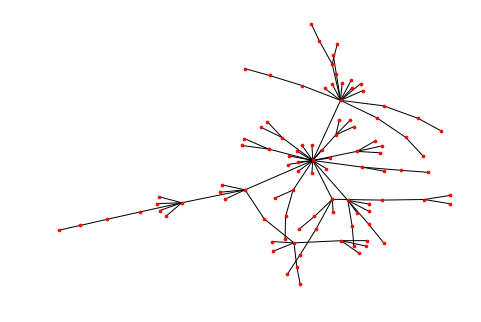

In [3]:
import random
import numpy as np

BA1 = nx.Graph()
BA1.add_nodes_from([1,2,3])
BA1.add_edge(1,2)
BA1.add_edge(2,3)

for i in range(4,100):
    a = np.array(BA1.edges())
    a = a.flatten()
    BA1.add_node(i)
    p = np.random.choice(a)
    BA1.add_edge(i,p)
    
nx.draw(BA1, node_size=7)

<u>Question :</u> Now create a 5000 node network.
<li>What's the maximum and minimum degree?</li>
<li>Now, bin the degree distribution, for example using numpy.histogram.</li>
<li>Plot the distribution. Plot it with both linear and log-log axes.</li>

In [4]:
BA2 = nx.Graph()
BA2.add_nodes_from([1,2,3])
BA2.add_edge(1,2)
BA2.add_edge(2,3)

for i in range(4,5000):
    a = np.array(BA2.edges())
    a = a.flatten()
    BA2.add_node(i)
    p = np.random.choice(a)
    BA2.add_edge(i,p)
    
nx.draw(BA2, node_size=7)

KeyboardInterrupt: 

In [ ]:
degrees = BA2.degree()

deg = [k[1] for k in degrees]
maxDegree = max(deg)
minDegree = min(deg)

print("The maximum degree of the network is %s and the minimum one is %s." %(maxDegree, minDegree))

In [6]:
import pandas as pd
import math

occurences_deg = pd.Series(deg).value_counts()
a = plt.plot(occurences_deg.index,occurences_deg.values,'go',markersize=2)
a = plt.title("Distribution of the network")
a = plt.ylabel("Counts")
a = plt.xlabel("Degrees")

a = plt.figure()
a = plt.loglog(occurences_deg.index,occurences_deg.values,'ro',markersize=2)
a = plt.title("log-log distribution of the network")
a = plt.ylabel("Counts")
a = plt.xlabel("Degrees")

a = plt.figure()
a = plt.bar(occurences_deg.index,occurences_deg.values,width=2,color="red",edgecolor="blue")
a = plt.title('Repartition of the distribution')
a = plt.ylabel("Counts")
a = plt.xlabel("Degrees")

NameError: name 'deg' is not defined

# 3. Power-laws and the friendship paradox

<u>Question :</u>
<li>Pick a node i at random (e.g. use random.choice). Find its degree.</li>
<li>Find i's neighbors. And calculate their average degree.</li>
<li>Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.</li>
<li>Do this 1000 times. How many out of those 1000 times is the friendship paradox true?</li>

In [ ]:
counterParadoxAnswer = [0,0]

for i in range(1000):
    randNode = random.choice(list(BA2.nodes))
    randNodeDegree = BA2.degree(randNode)
    randNodeNeighbors = list(BA2.neighbors(randNode))

    average_degree_friends = 0
    for neighbor in randNodeNeighbors:
        average_degree_friends += BA2.degree(neighbor)
    average_degree_friends /= len(randNodeNeighbors)
    if(average_degree_friends > randNodeDegree):
        counterParadoxAnswer[0] += 1
    else:
        counterParadoxAnswer[1] += 1

print("The friendship paradox is %s times out of 1000 true" %counterParadoxAnswer[0])

# <u>Part Two: The network of American politics</u>

# 4. Basic stats for pages over time

Put together descriptive statistics for the US house of representatives over time (e.g. for the 113, 114 and 115th, congress).
<li>By the word member we mean a politician who has been elected to the house of representatives. Plot the number of members of the house of Representatives over time. You chose if you want to use a line-chart or a bar-chart. Is this development over time what you would expect? Why? Explain in your own words.


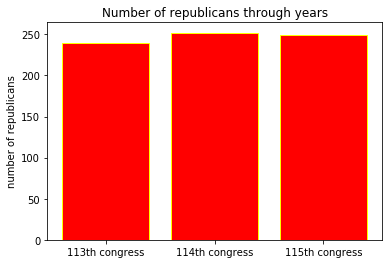

In [7]:
df1 = pd.read_csv('./data/H113.csv')
df2 = pd.read_csv('./data/H114.csv')
df3 = pd.read_csv('./data/H115.csv')

nb_republicans = [len(df1[df1.Party=='Republican']), len(df2[df2.Party=='Republican']), len(df3[df3.Party=='Republican'])]

a = plt.bar([0,1,2],nb_republicans, color = 'red',edgecolor="yellow")
a = plt.ylabel("number of republicans")
a = plt.title('Number of republicans through years')
a = plt.xticks([0,1,2], ('113th congress','114th congress','115th congress'))

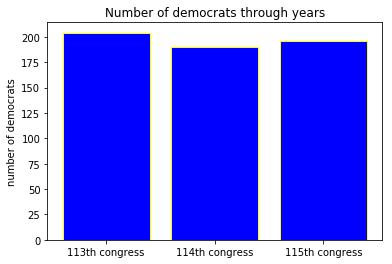

In [8]:
nb_democrats = [len(df1[df1.Party=='Democratic']), len(df2[df2.Party=='Democratic']), len(df3[df3.Party=='Democratic'])]

b = plt.bar([0,1,2],nb_democrats, color = 'blue',edgecolor="yellow")
b = plt.ylabel("number of democrats")
b = plt.title('Number of democrats through years')
b = plt.xticks([0,1,2], ('113th congress','114th congress','115th congress'))

[444, 442, 445]


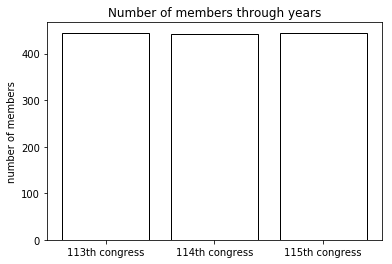

In [9]:
nb_members = [len(df1), len(df2), len(df3)]
print(nb_members)
b = plt.bar([0,1,2],nb_members, color = 'white',edgecolor="black")
b = plt.ylabel("number of members")
b = plt.title('Number of members through years')
b = plt.xticks([0,1,2], ('113th congress','114th congress','115th congress'))

- Is this development over time what you would expect? Why?


    * The expected output would be a constant number of members in the house of representatives. It seems logical to always have the same number of politicians in this institution.

<li>How many members appear in all the three congresses? How many in two? How many in one? Plot your results using a histogram.

In [10]:
df1['congress_nb'] = 113
df2['congress_nb'] = 114
df3['congress_nb'] = 115
groups = pd.concat([df1, df2, df3]).groupby('WikiPageName')
times_in_congress = groups.size().sort_values()
result = times_in_congress.groupby(times_in_congress).size()

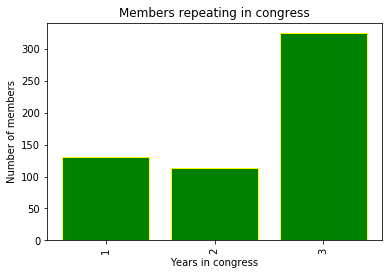

In [11]:
a = plt.bar([i for i in range(len(result))],result, color = 'green',edgecolor="yellow")
a = plt.title("Members repeating in congress")
a = plt.ylabel("Number of members")
a = plt.xlabel('Years in congress')
a = plt.xticks([i for i in range(len(result))], result.keys() ,rotation='vertical')

<li>Which states are more represented in the house of representatives? Which are less? Plot a histogram showing the number of members per state.

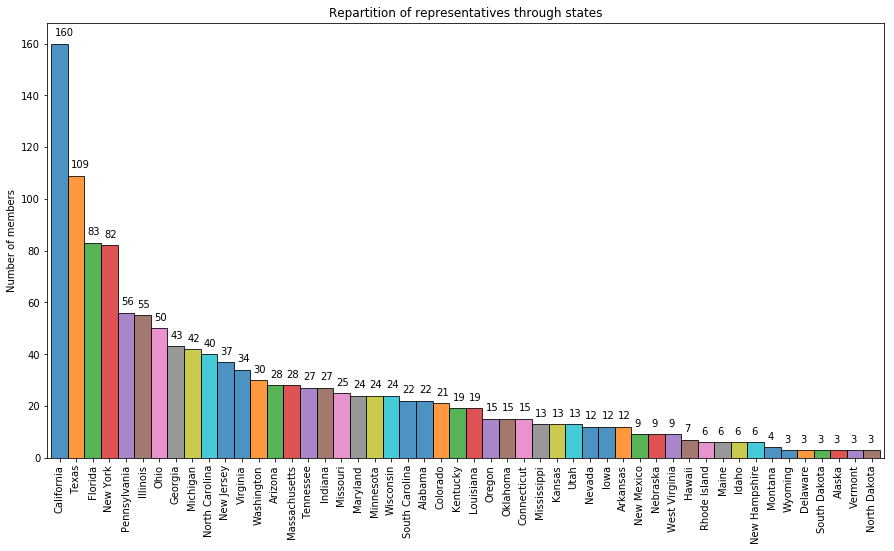

In [53]:
df = pd.concat([df1,df2,df3])
#query = df.Party=='Democratic'
#democratics = df[query]

# count the number of occurence values given a certain key
ListnumberPerState = df['State'].value_counts() 

ax = ListnumberPerState.plot.bar(width=1,alpha=0.8,edgecolor='black')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), xy=(p.get_x()+0.2, p.get_height()+3))
ax = plt.ylabel("Number of members")
ax = plt.title("Repartition of representatives through states")
f

<li>How has the party composition of the house of representative changed over time? Plot your results.

In [ ]:
democratics = (len(df1[df1.Party=='Democratic']),len(df2[df2.Party=='Democratic']),len(df3[df3.Party=='Democratic']))
republicans = (len(df1[df1.Party=='Republican']),len(df2[df2.Party=='Republican']),len(df3[df3.Party=='Republican']))

p1 = plt.bar([0,1,2], democratics, width=0.50, color='blue')
p2 = plt.bar([0,1,2], republicans, width=0.50, color='red',bottom=democratics)
a = plt.xticks([0,1,2], ('113th congress','114th congress','115th congress'))
a = plt.legend((p1[0], p2[0]), ('Democratics', 'Republicans'))
a = plt.title('Party compositions through the different congress')
a = plt.ylabel('Number of members')

# 5. Basic stats for the network

- What is the number of nodes in the network? And the number of links?
- Who is the most connected representative?

In [ ]:
import io, re
congress113nw = nx.DiGraph()
path_folder = "./Representatives/113/"
for congressman in df1.WikiPageName.sort_values():
    #new node with congressman's info
    congress113nw.add_node(congressman,
                           state=df1[df1.WikiPageName == congressman].State,
                           party=df1[df1.WikiPageName == congressman].Party)

    f = io.open(path_folder+congressman+'.txt', 'r', encoding='utf-8').read()
    links = re.findall("\[\[(.*?)\]\]", f)
    links_simple = list()
    wikilink_rx = re.compile(r'\[\[(?:[^|\]]*)\|?([^\]]+)\]\]')
    for l in links:
        match = re.search(r'([a-zA-Z0-9_\s\(\)\-\,.]*)\|([a-zA-Z0-9_\s\(\)\-\,.]*)', l)
        if match == None:
            m = l.replace(" ", "_")
            if m in set(df1.WikiPageName):
                congress113nw.add_edge(congressman, m)
        else:
            m1 = match.group(1).replace(" ", "_")
            m2 = match.group(2).replace(" ", "_")
            if m1 in set(df1.WikiPageName):
                congress113nw.add_edge(congressman, m1)
            if m2 in set(df1.WikiPageName):
                congress113nw.add_edge(congressman, m2)

In [ ]:
nb_nodes = len(congress113nw.nodes)
nb_links = len(congress113nw.edges)
mostCntd = max(congress113nw.degree(), key=lambda x : x[1])
print('There are %s nodes in the 133th Congress Network and a total of %s links.\n Being %s the most connected member.' % (nb_nodes, nb_links, mostCntd[0]))

- Plot the in and out-degree distributions.

In [ ]:
def plot_in_degree_distr():
    degs={}
    for n in congress113nw.nodes():
        deg = congress113nw.in_degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] += 1
    items = sorted(degs.items())
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot([k for (k,v) in items], [v for (k,v) in items])
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.xlabel('Node\'s degree')
    plt.ylabel('Nodes with same degree')
    plt.title('113th House of Representatives In Degree Distribution')

def plot_out_degree_distr():
    degs={}
    for n in congress113nw.nodes():
        deg = congress113nw.out_degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] += 1
    items = sorted(degs.items())
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot([k for (k,v) in items], [v for (k,v) in items])
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.xlabel('Node\'s degree')
    plt.ylabel('Nodes with same degree')
    plt.title('113th House of Representatives Out Degree Distribution')

In [ ]:
plot_in_degree_distr()

In [ ]:
plot_out_degree_distr()

We used the log,log axis to show more clearly the members of the congress with the same number of connections since the vast majority of them have a value between 1 and 10.